In [60]:
import os
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
import numpy as np

In [61]:
class VoxelizedShapeNetDataset(Dataset):
    def __init__(self, root_dir, aligned=True):
        self.root_dir = root_dir
        self.aligned = aligned
        self.synset_ids = os.listdir(root_dir)
        self.model_paths = []
        for synset_id in self.synset_ids:
            for model_id in os.listdir(os.path.join(root_dir, synset_id)):
                self.model_paths.append((synset_id, model_id, os.path.join(root_dir, synset_id, model_id)))
    
    def __len__(self):
        return len(self.model_paths)

    def __getitem__(self, idx):
        synset_id, model_id, model_path = self.model_paths[idx]
        if self.aligned:
            voxel_array = np.load(os.path.join(model_path, 'aligned_voxel.npy'))
        else:
            voxel_array = np.load(os.path.join(model_path, 'voxel.npy'))
        return synset_id, model_id, torch.from_numpy(voxel_array)

In [62]:
# Initialize ShapeNetCore dataset
SHAPENET_PATH = "D:/ShapeNet_Voxelized"
aligned_dataset = VoxelizedShapeNetDataset(SHAPENET_PATH, aligned=True)
unaligned_dataset = VoxelizedShapeNetDataset(SHAPENET_PATH, aligned=False)

In [63]:
print(len(aligned_dataset))
print(len(unaligned_dataset))

52444
52444


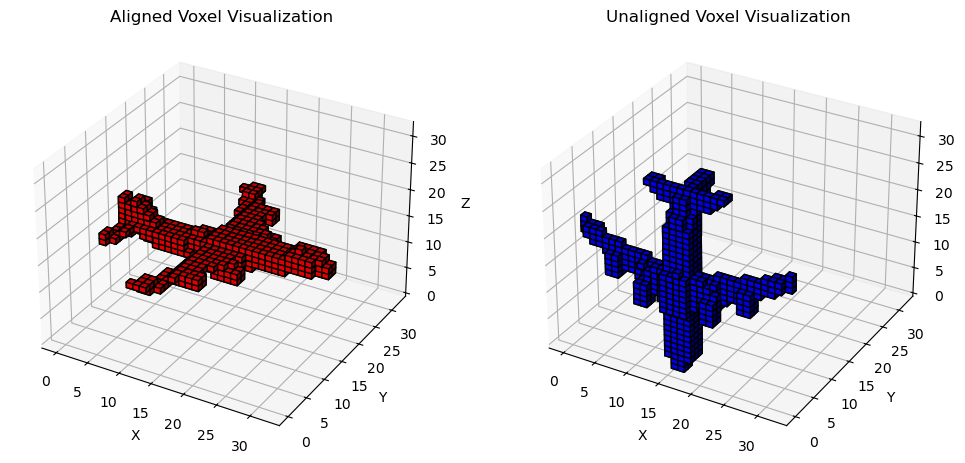

In [68]:
Model_num = 42

# Get a voxel array from each dataset
aligned_voxel_array = aligned_dataset[Model_num][2]
unaligned_voxel_array = unaligned_dataset[Model_num][2]

# Create a figure and two 3D axes
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot the filled voxels for the aligned model
ax1.voxels(aligned_voxel_array, facecolors='red', edgecolor="black")
ax1.set_title('Aligned Voxel Visualization')

# Plot the filled voxels for the unaligned model
ax2.voxels(unaligned_voxel_array, facecolors='blue', edgecolor="black")
ax2.set_title('Unaligned Voxel Visualization')

# Set plot labels
for ax in [ax1, ax2]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.show()